In [9]:
import matplotlib.pyplot as plt
from huffman_code import huffman_code
import numpy as np

# Ejercicio 1

In [10]:
def PMF(path):
    with open (path,'r', encoding='utf-8') as f:
        texto = f.read()

    #Diccionario de conteo -> clase = palabra, valor = cantidad de apariciones
    apariciones = {}

    for elemento in texto:
        if elemento in apariciones:
            apariciones[elemento] += 1
        else:
            apariciones[elemento] = 1
    
    #Diccionario de probabilidades -> clase = palabra, valor = probabilidad de aparición
    probabilidades = {}
    n = len(texto)
    for caracter,repeticiones in apariciones.items():
        #La probabilidad de aparición del caracter es la frecuencia relativa de aparición del mismo, es decir, la cantidad de apariciones sobre el total de elementos del texto
        probabilidades[caracter] = repeticiones / n
    
    #Devolución del diccionario de probabilidades, ordenadas de manera ascendente
    return dict(sorted(probabilidades.items(),key = lambda x: x[1], reverse = True))


In [11]:
def graficos(probabilidades,archivo):
    caracteres = list(probabilidades.keys())
    pmfs = list(probabilidades.values())

    #Gráfico de barras
    plt.figure(figsize= (10,5))
    plt.bar(caracteres,pmfs,color = 'green')    
    plt.title(f'Frecuecia estimada de aparicion de caracteres en {archivo}')
    plt.xlabel('Caracter')
    plt.ylabel('p(x)')
    plt.yscale("log")
    plt.show()
    plt.show()

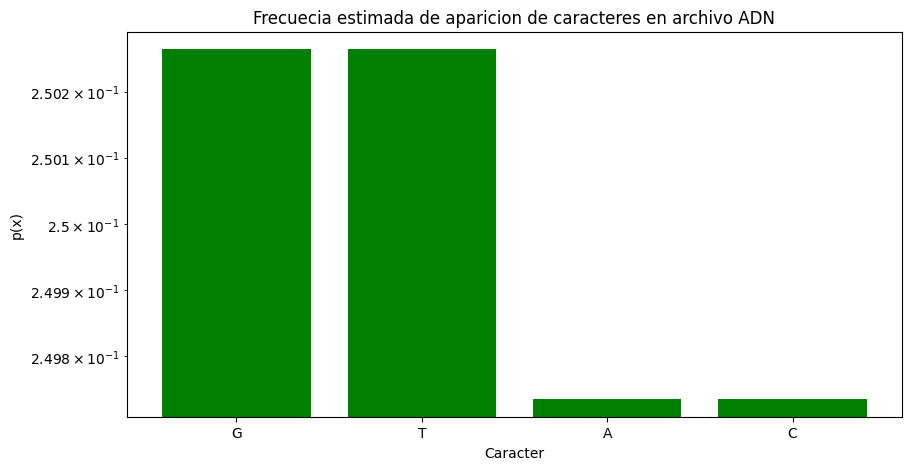

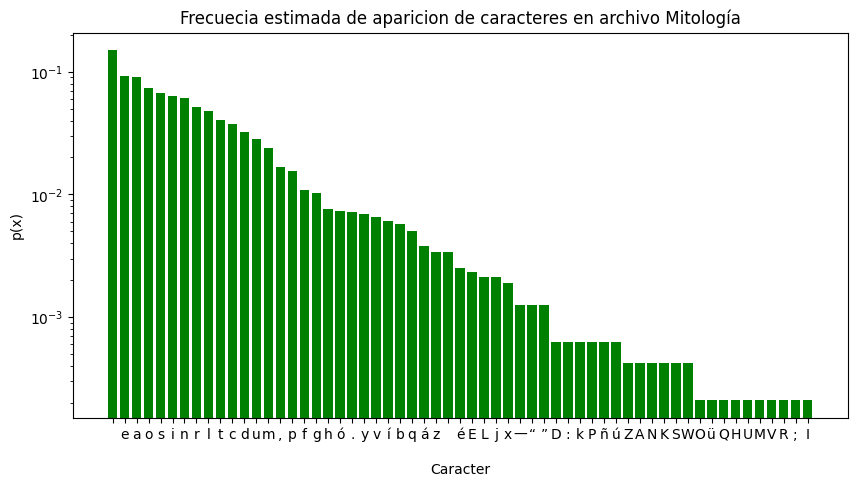

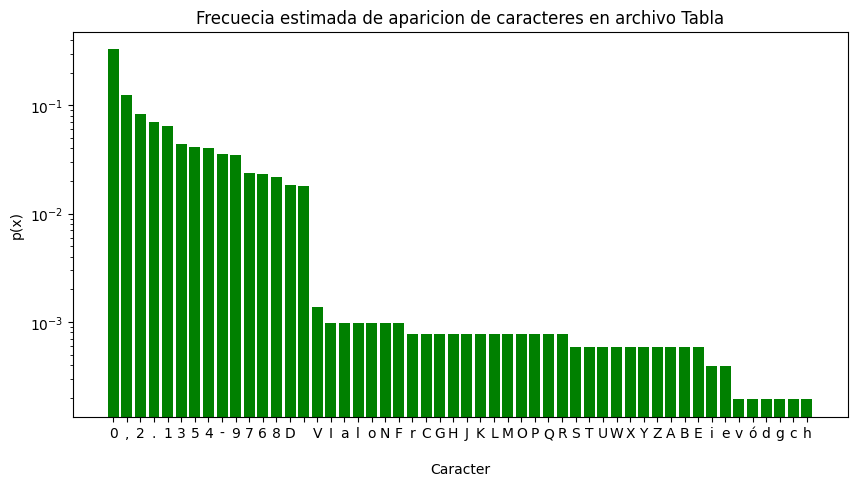

In [12]:
if __name__ == "__main__":
    archivos = ["textos/adn.txt","textos/mitología.txt","textos/tabla.txt"]
    #Definicon de nombres para los graficos
    nombres = ["ADN","Mitología","Tabla"]
    probabilidades = [PMF(archivo) for archivo in archivos]
    
    for archivo in archivos:
        probabilidad = probabilidades[archivos.index(archivo)]
        graficos(probabilidad,"archivo " + nombres[archivos.index(archivo)])

# Ejercicio 2

In [13]:
def huffman_texto(path,probabilidades):
    #Apertura del archivo
    with open(path,'r') as f:
        texto = f.read()
    #Utilización de la función de Huffman provista para obtener el código de cada caracter
    huffman_caracter = huffman_code(probabilidades)
    #Obtención del texto codificado
    return ''.join([huffman_caracter[caracter] for caracter in texto])


In [14]:
def L(probabilidades):
    #Calculo de la longitud promedio del código de Huffman
    huffman_caracter = huffman_code(probabilidades)
    suma = 0
    for caracter,frecuencia_aparicion in probabilidades.items():
        #L = Σ p(xi) * l(xi)
        suma += frecuencia_aparicion * len(huffman_caracter[caracter])
    return suma 

In [15]:
def cantidad_bits(probabilidades):
    #Cálculo de la cantidad minima de bits necesarios para representar los caracteres
    N = len(probabilidades)
    L_uniforme = int(np.ceil(np.log2(N)))
    return L_uniforme

In [16]:
def porcentaje_reduccion(L, L_uniforme):
    #Cálculo del porcentaje de memoria reducido al utiizar Huffman
    return ((L_uniforme - L)/L_uniforme) * 100

In [17]:
if __name__ == "__main__":
    archivos = ["textos/adn.txt","textos/mitología.txt","textos/tabla.txt"]

    for archivo in archivos:
        L_promedio = L(probabilidades[archivos.index(archivo)])
        L_uniforme = cantidad_bits(probabilidades[archivos.index(archivo)])
        reduccion = porcentaje_reduccion(L_promedio, L_uniforme)
        
        print(f"Archivo: {nombres[archivos.index(archivo)]}")
        print(f"Longitud promedio del código de Huffman: {L_promedio}")
        print(f"Cantidad de bits necesarios con código fijo: {L_uniforme}")
        print(f"Porcentaje de reducción al usar código de Huffman: {reduccion} %")
        print("-----------------------------------------------------")

Archivo: ADN
Longitud promedio del código de Huffman: 1.9999999999999998
Cantidad de bits necesarios con código fijo: 2
Porcentaje de reducción al usar código de Huffman: 1.1102230246251565e-14 %
-----------------------------------------------------
Archivo: Mitología
Longitud promedio del código de Huffman: 4.366182354179828
Cantidad de bits necesarios con código fijo: 6
Porcentaje de reducción al usar código de Huffman: 27.230294097002865 %
-----------------------------------------------------
Archivo: Tabla
Longitud promedio del código de Huffman: 3.530120481927708
Cantidad de bits necesarios con código fijo: 6
Porcentaje de reducción al usar código de Huffman: 41.1646586345382 %
-----------------------------------------------------


# Ejercicio 3

In [18]:
def entropia(probabilidades):
    #Cálculo de la entropía 
    H = 0
    for _,frecuencia_aparicion in probabilidades.items():
        #H = - Σ p(xi) * log2(p(xi))
        H += frecuencia_aparicion * np.log2(frecuencia_aparicion)
    return -H

In [19]:
if __name__ == "__main__":
    entropias = [entropia(probabilidad) for probabilidad in probabilidades]
    for archivo in archivos:
        print(f"Entropía archivo {nombres[archivos.index(archivo)]}: {entropias[archivos.index(archivo)]} bits/símbolo")

Entropía archivo ADN: 1.999999192242485 bits/símbolo
Entropía archivo Mitología: 4.332976793102956 bits/símbolo
Entropía archivo Tabla: 3.4808567570969107 bits/símbolo


# Ejercicio 4

In [20]:
def entropia_normalizada(probabilidades):
    #Calculo de la entropia normalizada mediante la formula H(x) / log2(N)
    N = len(probabilidades)
    H = entropia(probabilidades)
    return H / np.log2(N)

In [21]:
if __name__ == "__main__":
    entropias_normalizadas = [entropia_normalizada(probabilidad) for probabilidad in probabilidades]
    for archivo in archivos:
        print(f"Entropía normalizada archivo {nombres[archivos.index(archivo)]}: {entropias_normalizadas[archivos.index(archivo)]} bits/símbolo")

Entropía normalizada archivo ADN: 0.9999995961212425 bits/símbolo
Entropía normalizada archivo Mitología: 0.736569728393261 bits/símbolo
Entropía normalizada archivo Tabla: 0.6106295179334016 bits/símbolo
